<a href="https://colab.research.google.com/github/Preeti-ing/Image-classification/blob/main/IC_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import Model

In [2]:
(train_images, train_labels), (test_images,test_labels)=datasets.cifar10.load_data()
train_images , test_images = train_images/255.0 , test_images/255.0


170498071/170498071 [==============================] - 11s 0us/step


In [3]:
class_label = ['cats','cow','dogs','water','toy','airplane','truck','house','bicycle']

In [4]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 85s 53ms/step - loss: 1.5173 - accuracy: 0.4459 - val_loss: 1.2521 - val_accuracy: 0.5519
Epoch 2/10
1563/1563 [==============================] - 82s 53ms/step - loss: 1.1550 - accuracy: 0.5928 - val_loss: 1.1081 - val_accuracy: 0.6079
Epoch 3/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.0077 - accuracy: 0.6469 - val_loss: 1.0801 - val_accuracy: 0.6239
Epoch 4/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9077 - accuracy: 0.6814 - val_loss: 0.9384 - val_accuracy: 0.6750
Epoch 5/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8317 - accuracy: 0.7077 - val_loss: 0.9193 - val_accuracy: 0.6793
Epoch 6/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.7730 - accuracy: 0.7294 - val_loss: 0.9685 - val_accuracy: 0.6757
Epoch 7/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.7202 - accuracy: 0.7474 - val_loss: 0.9100 -

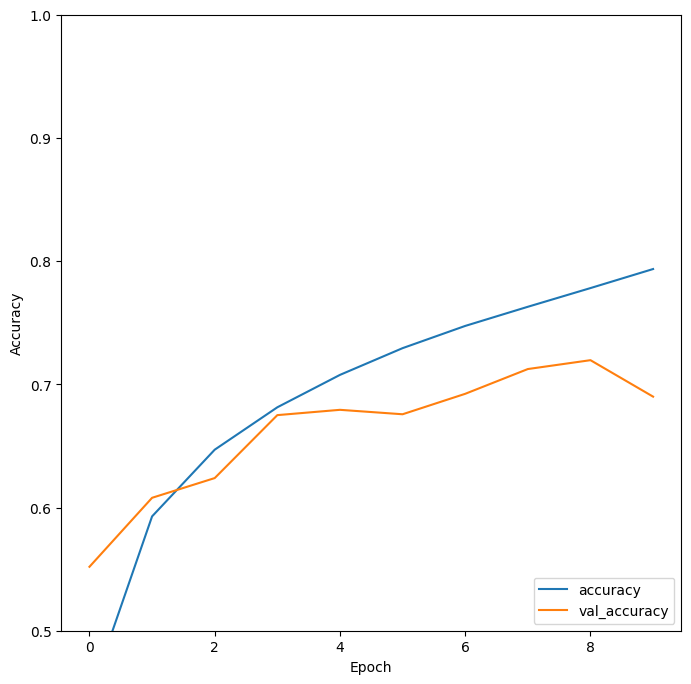

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.savefig("output_report.png")